In [4]:
import pandas as pd

kc_houses = pd.read_csv('/Users/flatironschool/Documents/dsc-v2-mod1-final-project-houston-ds-060319/kc_house_data.csv')

In [9]:
kc_houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
kc_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [11]:
kc_houses.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [12]:
kc_houses['waterfront'].unique()

array([nan,  0.,  1.])

How does location(lat/long,zipcode,waterfront) relate to price?
How do year built/year renovated relate to price?
is the target normally distributed?

what is condition? is it a categorical variable?
what is grade?
were lots redrawn/resized in 2015? what is sqft_lot15?

In [13]:
kc_houses['condition'].unique()

array([3, 5, 4, 1, 2])

In [14]:
kc_houses['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

https://www.kaggle.com/shivachandel/kc-house-data/activity

In [15]:
kc_houses['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# from pandas.plotting import scatter_matrix
# pd.plotting.scatter_matrix(kc_houses, figsize = (18,15))
# plt.show()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


KeyboardInterrupt: 

<Figure size 1440x1296 with 0 Axes>

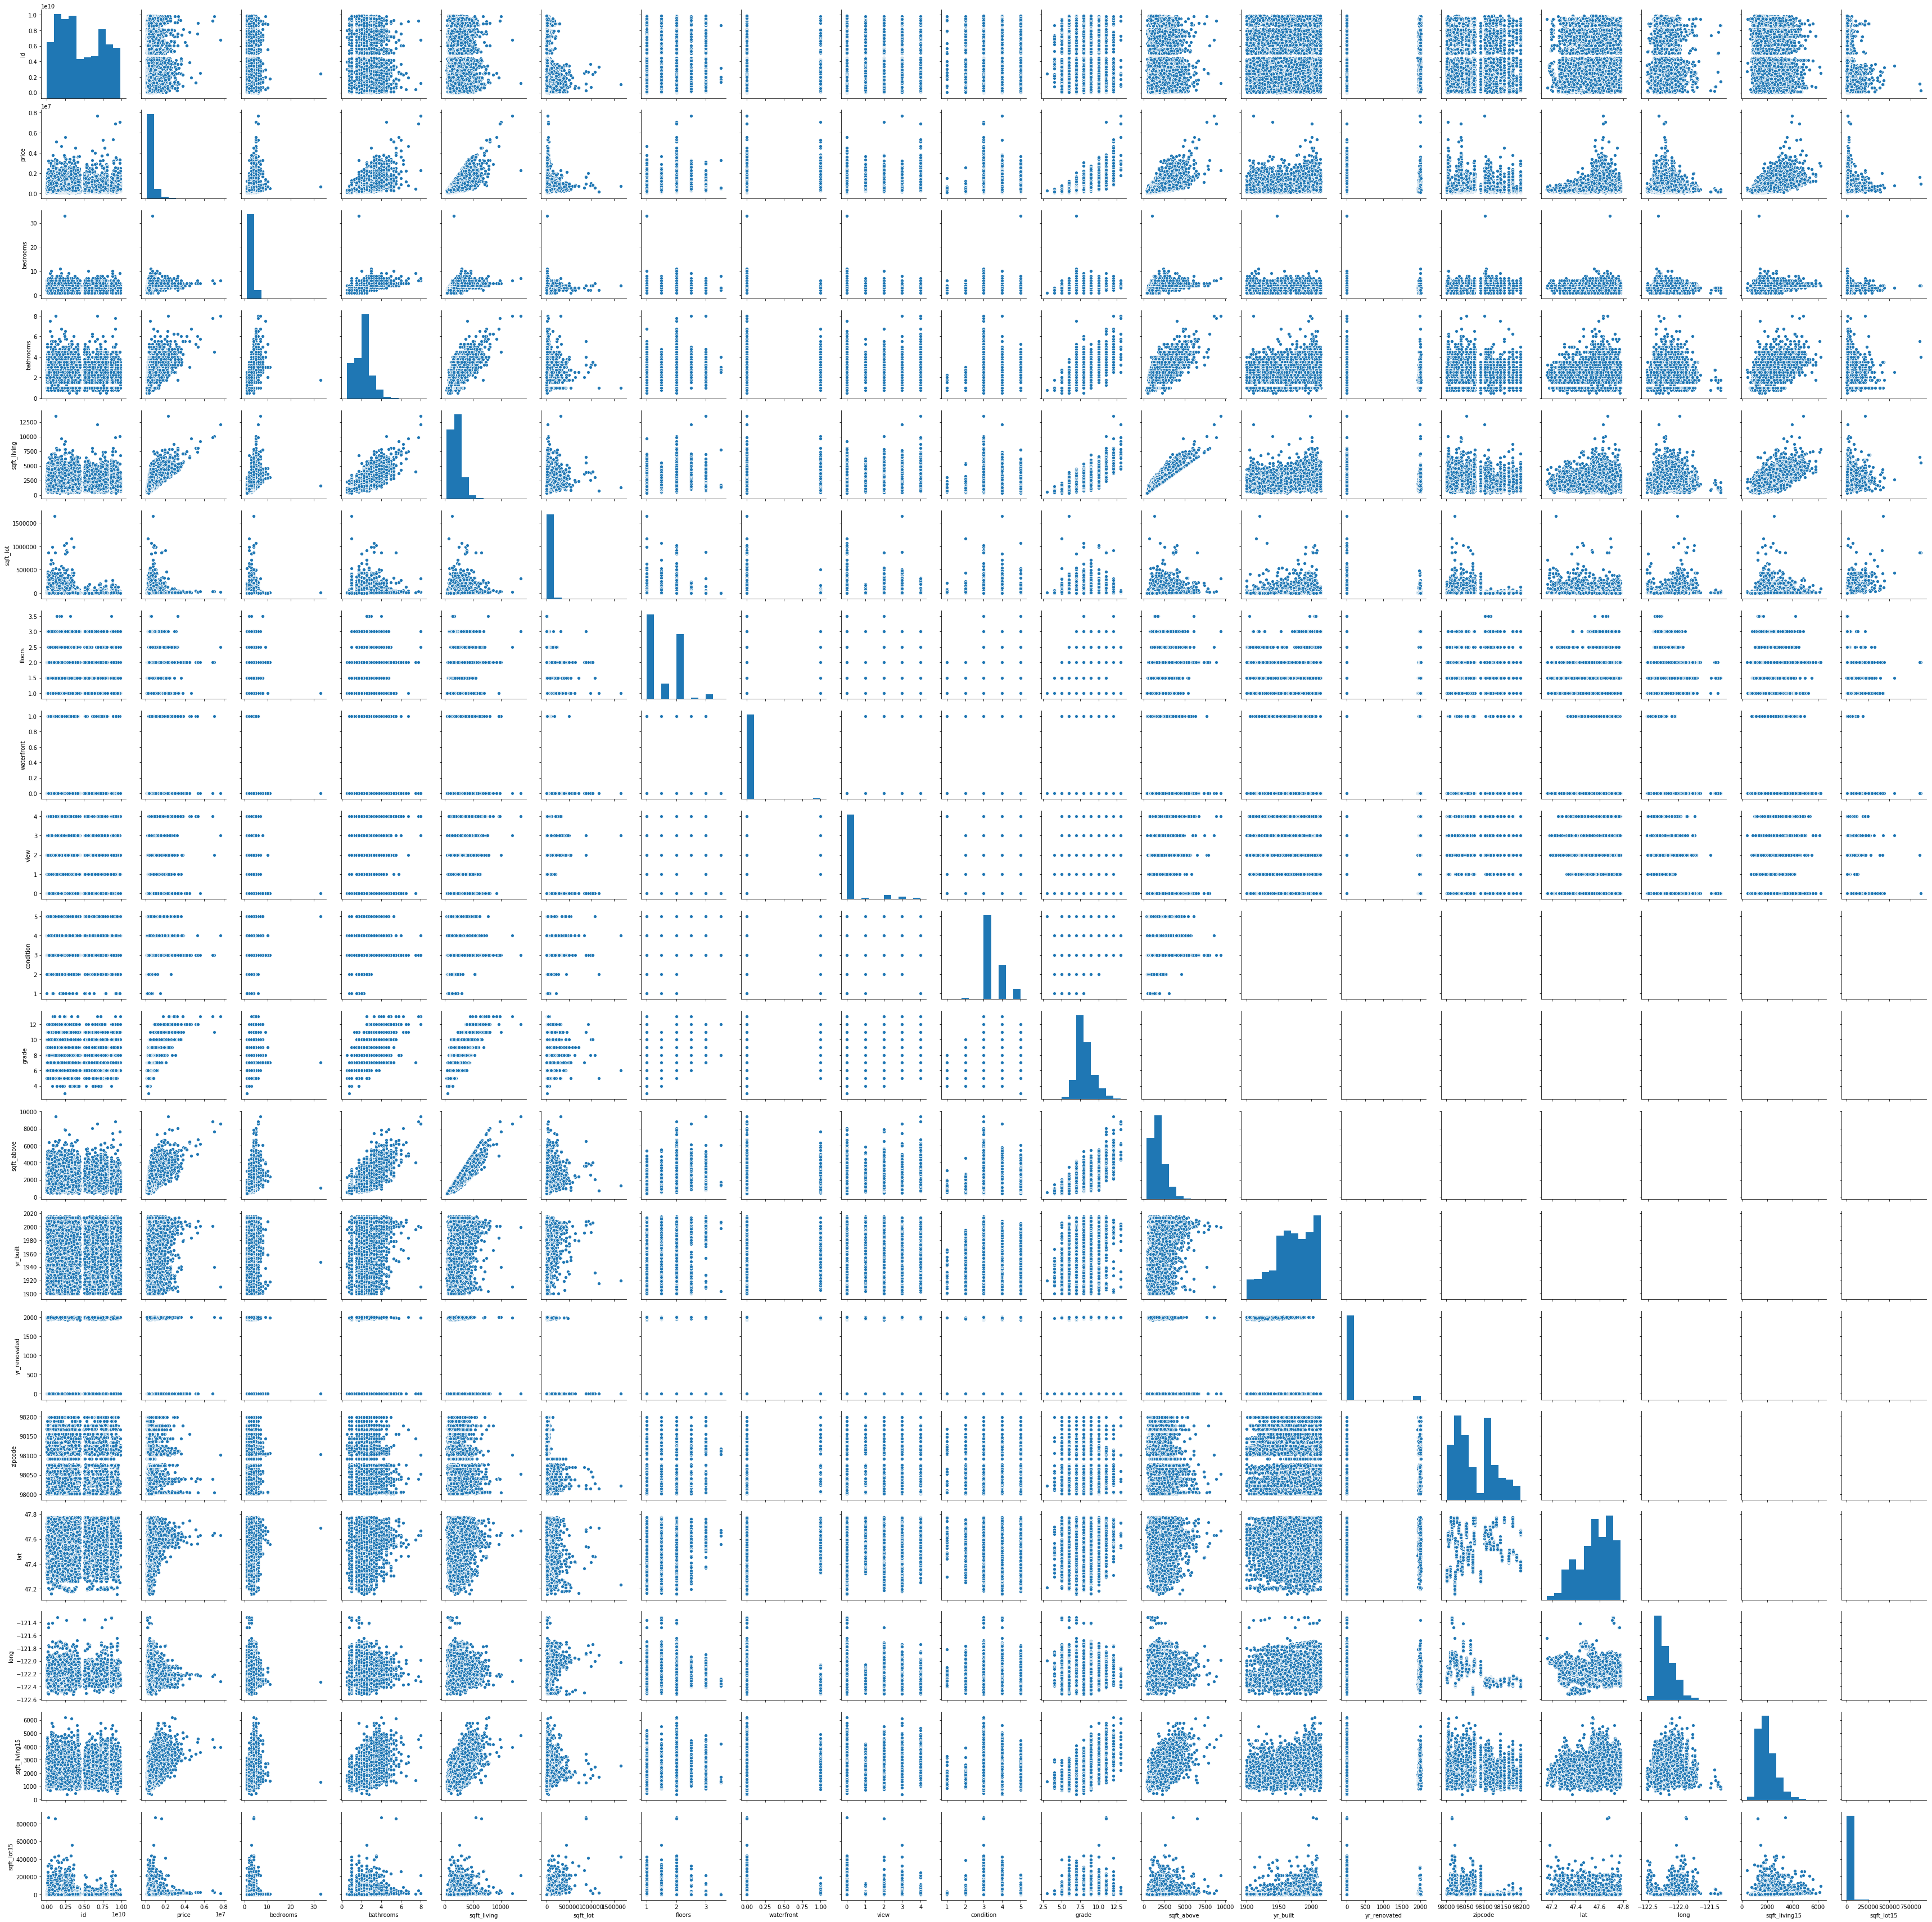

In [6]:
import seaborn as sns
plt.figure(figsize = (20,18))
sns.pairplot(kc_houses)

In [8]:
smaller = kc_houses[['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_basement','sqft_above','yr_built','sqft_living15','sqft_lot15']]

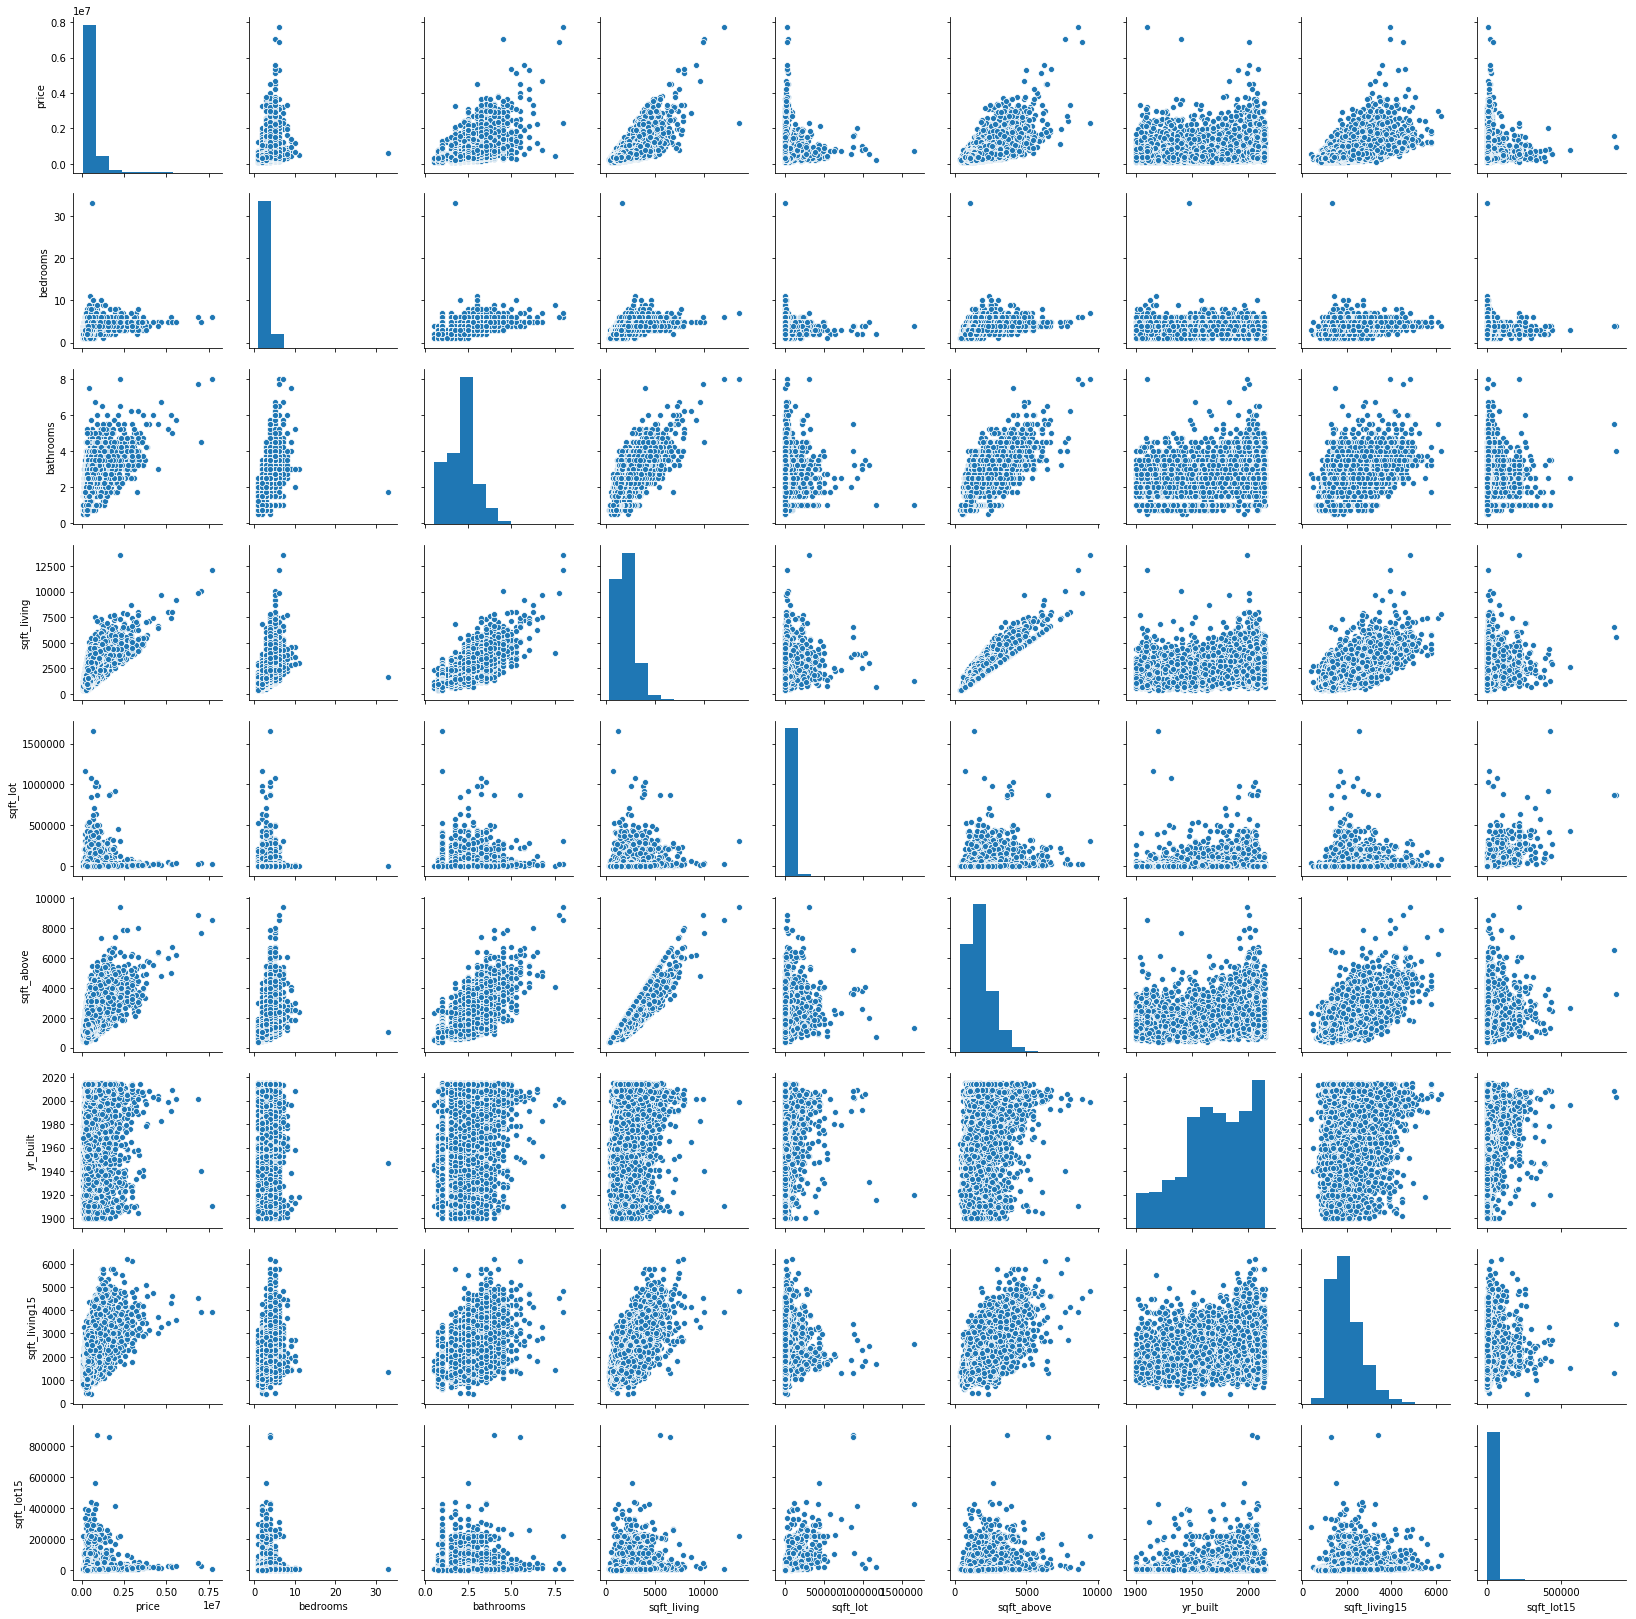

In [9]:
sns.pairplot(smaller)

In [10]:
kc_houses['sqft_lot'].describe()

count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [11]:
outie = kc_houses[kc_houses['sqft_lot']>1500000]

In [12]:
outie

id       date     price  bedrooms  bathrooms  sqft_living  \
1717  1020069017  3/27/2015  700000.0         4        1.0         1300   

      sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
1717   1651359     1.0         0.0   3.0     ...          6        1300   

      sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
1717            0.0     1920           0.0    98022  47.2313 -122.023   

      sqft_living15  sqft_lot15  
1717           2560      425581  

[1 rows x 21 columns]

(0, 500000)

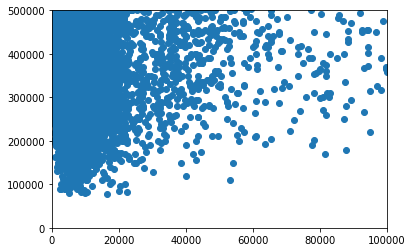

In [17]:
plt.scatter(kc_houses['sqft_lot'],kc_houses['price'])
# plt.xlim(0,100000)
# plt.ylim(0,5p00000)

(array([2.1049e+04, 2.3900e+02, 2.0100e+02, 4.9000e+01, 1.8000e+01,
        1.9000e+01, 8.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        4.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.20000000e+02, 8.30619500e+04, 1.65603900e+05, 2.48145850e+05,
        3.30687800e+05, 4.13229750e+05, 4.95771700e+05, 5.78313650e+05,
        6.60855600e+05, 7.43397550e+05, 8.25939500e+05, 9.08481450e+05,
        9.91023400e+05, 1.07356535e+06, 1.15610730e+06, 1.23864925e+06,
        1.32119120e+06, 1.40373315e+06, 1.48627510e+06, 1.56881705e+06,
        1.65135900e+06]),
 <a list of 20 Patch objects>)

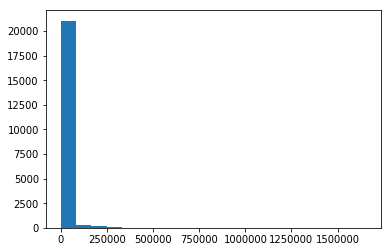

In [20]:
plt.hist(kc_houses['sqft_lot'],bins=20)

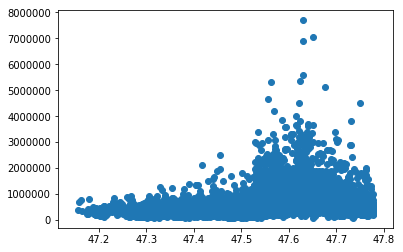

In [22]:
plt.scatter(kc_houses['lat'],kc_houses['price'])

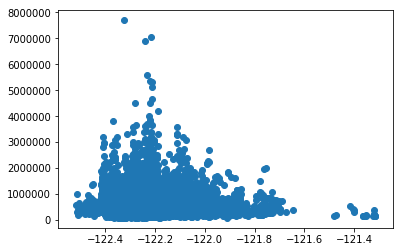

In [23]:
plt.scatter(kc_houses['long'],kc_houses['price'])

variables to include in model:
was_renovated
bedrooms
sqft_living? sqft_living/sqft_lot?


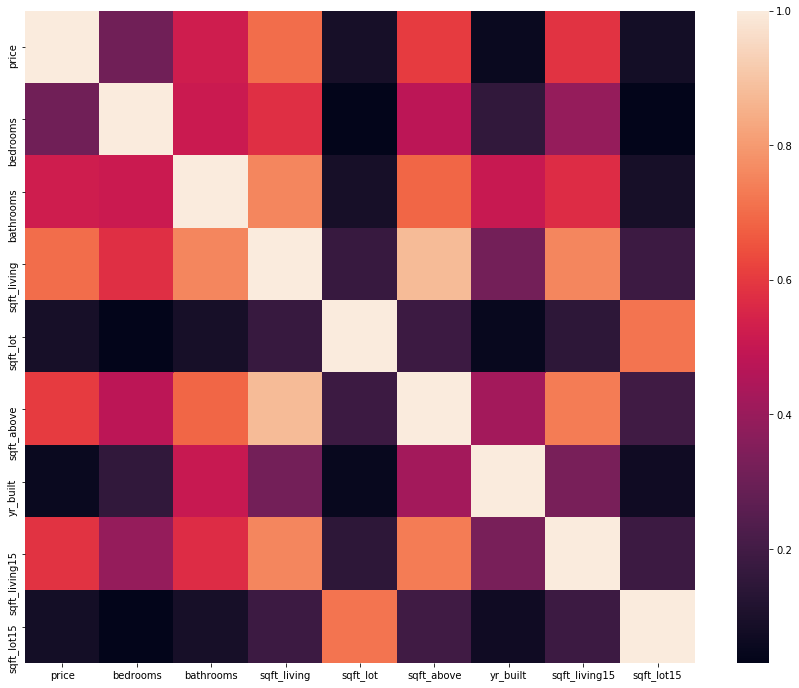

In [27]:
plt.figure(figsize =(15,12))
sns.heatmap(smaller.corr())